## Importing required packages

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [131]:
df = pd.read_csv('Ecommerce Customers.csv')

df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


## ========================================================================

# EDA

### Checking having duplicates in dataset

In [132]:
df[df.duplicated()]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


### --------------------------------------------------------------------------------------------------------------------------------------------------

### Describing all statistics of datasets for overview

In [133]:
df.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


### --------------------------------------------------------------------------------------------------------------------------------------------------

### Number of missing values in each feature

In [134]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### --------------------------------------------------------------------------------------------------------------------------------------------------

# Cleaning

### Email feature cleaning - as you see, there is no any pattern which model can take advantage of

### So, dropping it is better

In [135]:
df['Email'].nunique()

500

In [136]:
df.drop('Email', axis=1, inplace=True)

### --------------------------------------------------------------------------------------------------------------------------------------------------

### Address feature cleaning - Postal abbreviations are enough to explain address of costumers instead of long address

In [137]:
df['Address'].nunique()

500

In [138]:
df['Address'] = [x.split(' ')[-2] for x in df['Address']]

In [139]:
df['Address'].nunique()

62

In [140]:
df['Address'].value_counts()

AE    18
AA    17
DE    13
SC    13
MO    13
      ..
OH     5
TN     5
CT     5
WA     4
ID     3
Name: Address, Length: 62, dtype: int64

### --------------------------------------------------------------------------------------------------------------------------------------------------

### Avatar feature cleaning - Best thing which can be done to Avatar column is to change to RGB for explaining each values deeply

### To do it I've got help of webcolors library

In [141]:
import webcolors

In [142]:
df['Avatar'].nunique()

138

In [143]:
df['Avatar'].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

In [144]:
rgbs = [list(webcolors.name_to_rgb(x)) for x in df['Avatar']]

df['Red'] = [x[0] for x in rgbs]
df['Green'] = [x[1] for x in rgbs]
df['Blue'] = [x[2] for x in rgbs]

df.drop('Avatar', axis=1, inplace=True)

### --------------------------------------------------------------------------------------------------------------------------------------------------

### Time features - I calculated average time for addresses to understand that is there any difference among addresses which can help to model to predict better

In [145]:
by_address = pd.DataFrame(df.groupby("Address")['Avg. Session Length'].sum())
by_address['Address value counts'] = df['Address'].value_counts()
by_address = by_address.sort_values(by='Address value counts', ascending=False)

by_address['Avg for address'] = by_address['Avg. Session Length'] / by_address['Address value counts']

by_address

,Avg. Session Length,Address value counts,Avg for address
Address,,,
AE,594.467651,18,33.025981
AA,560.676457,17,32.980968
DE,430.563918,13,33.120301
SC,428.590634,13,32.968510
MO,425.651629,13,32.742433
...,...,...,...
MD,165.674173,5,33.134835
CO,161.754148,5,32.350830
WI,166.530481,5,33.306096


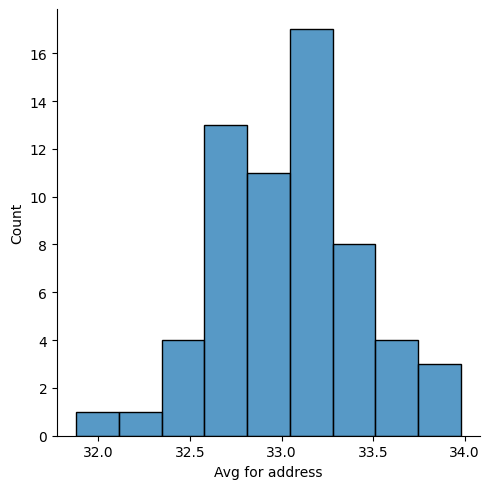

In [146]:
sns.displot(by_address['Avg for address'])

### --------------------------------------------------------------------------------------------------------------------------------------------------

## Color tone -  0 (dark)  -   1 (light)

## Luminosity Method

### grayscale = 0.3 * R + 0.59 * G + 0.11 * B}

In [147]:
df['gray_scale'] = 0.3*df['Red'] + 0.59*df['Green'] + 0.11*df['Blue']
df.drop(columns=['Red', 'Green', 'Blue'], inplace=True)

In [148]:
df

,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,gray_scale
0,MI,34.497268,12.655651,39.577668,4.082621,587.951054,174.28
1,CA,31.926272,11.109461,37.268959,2.664034,392.204933,59.00
2,DC,33.000915,11.330278,37.110597,4.104543,487.547505,232.58
3,OH,34.305557,13.717514,36.721283,3.120179,581.852344,84.50
4,PR,33.330673,12.795189,37.536653,4.446308,599.406092,170.25
...,...,...,...,...,...,...,...
495,UT,33.237660,13.566160,36.417985,3.746573,573.847438,184.60
496,CA,34.702529,11.695736,37.190268,3.576526,529.049004,147.95
497,TN,32.646777,11.499409,38.332576,4.958264,551.620145,247.02
498,TX,33.322501,12.391423,36.840086,2.336485,456.469510,89.60


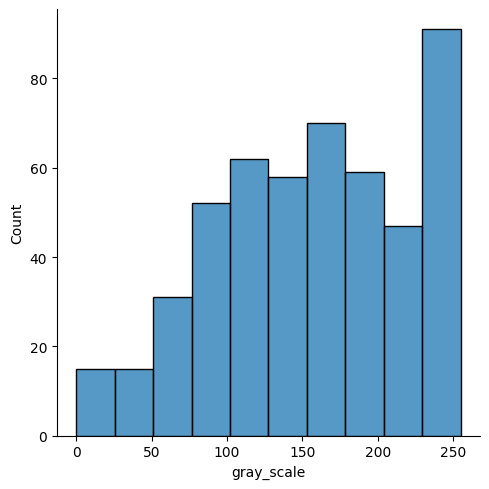

In [149]:
sns.displot(df['gray_scale'])

## Setting X and y values

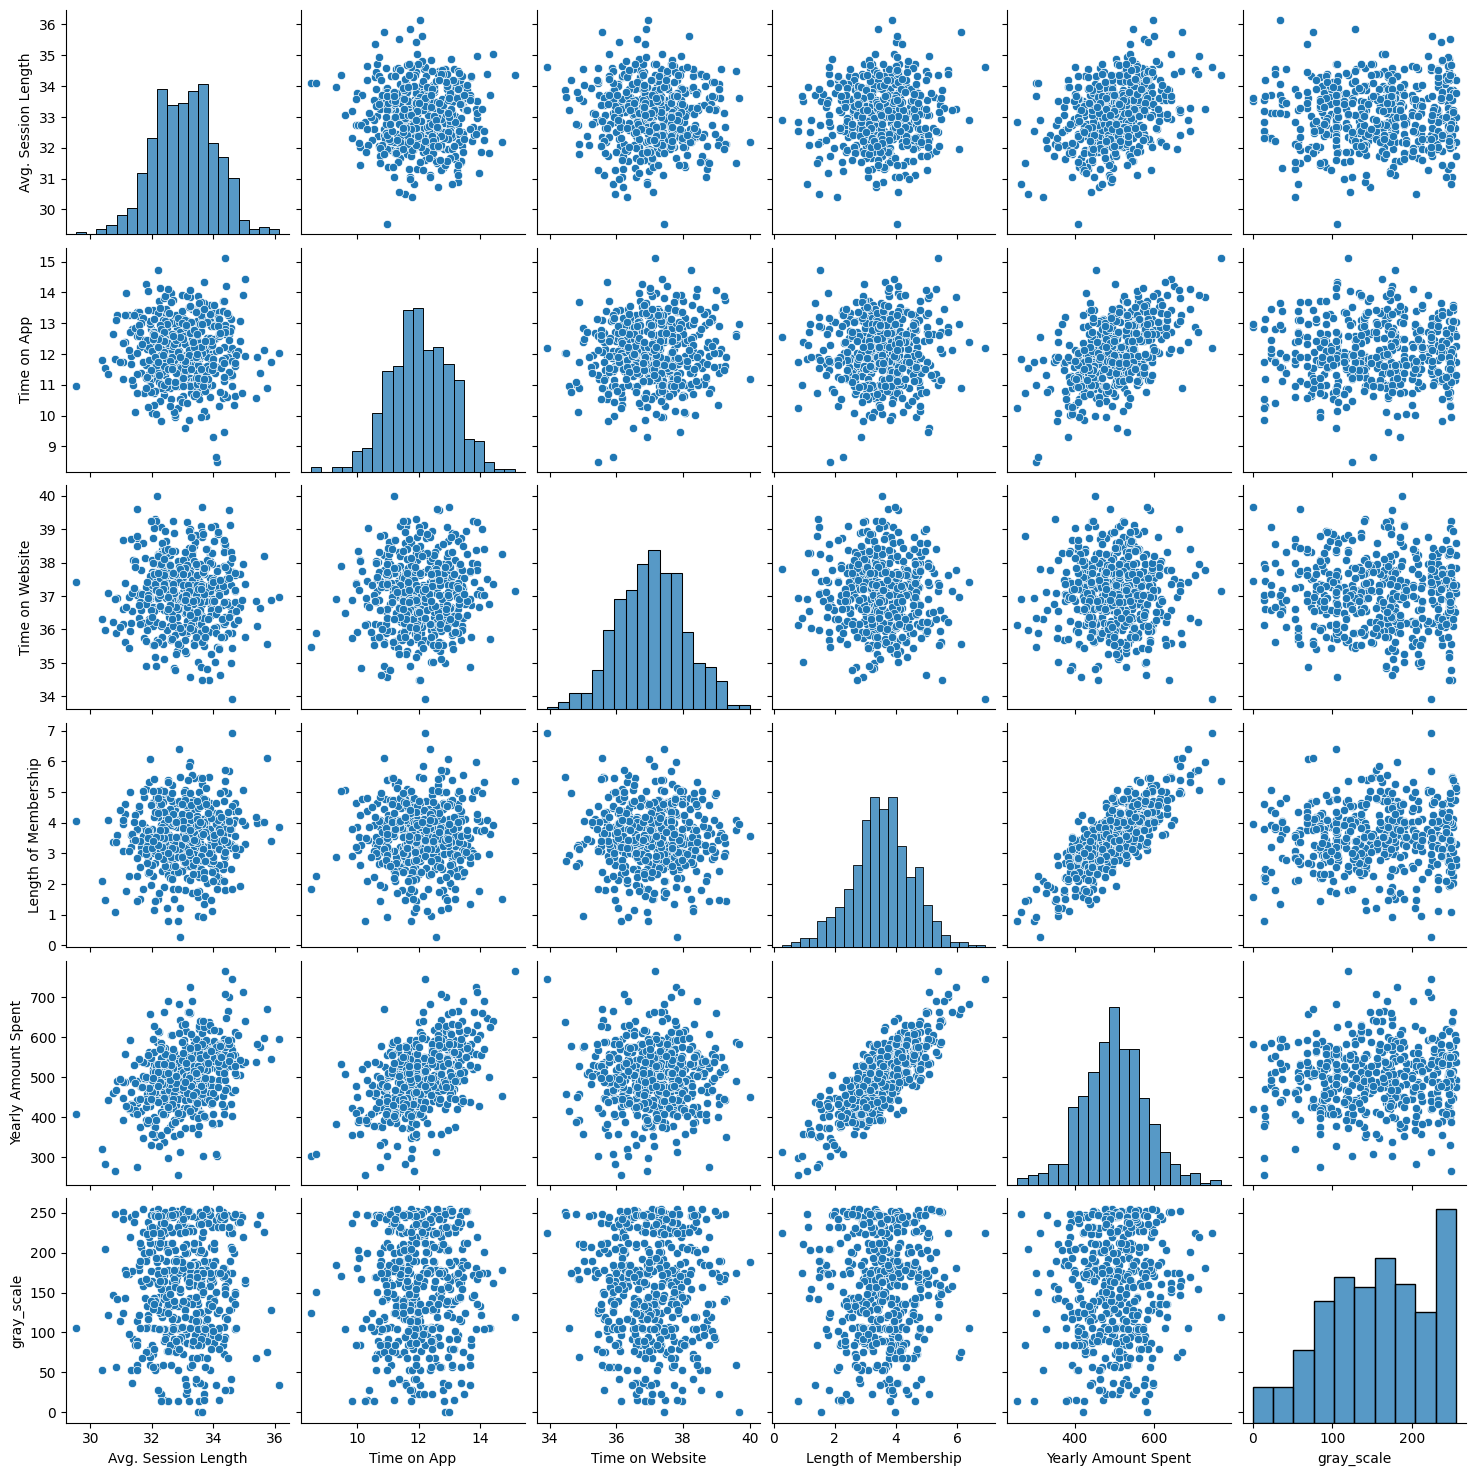

In [150]:
sns.pairplot(df)

In [178]:
X = df.drop(columns=['Yearly Amount Spent', 'Address', 'Time on Website'], axis=1)
y = df['Yearly Amount Spent']

## Data splitting

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<AxesSubplot: >

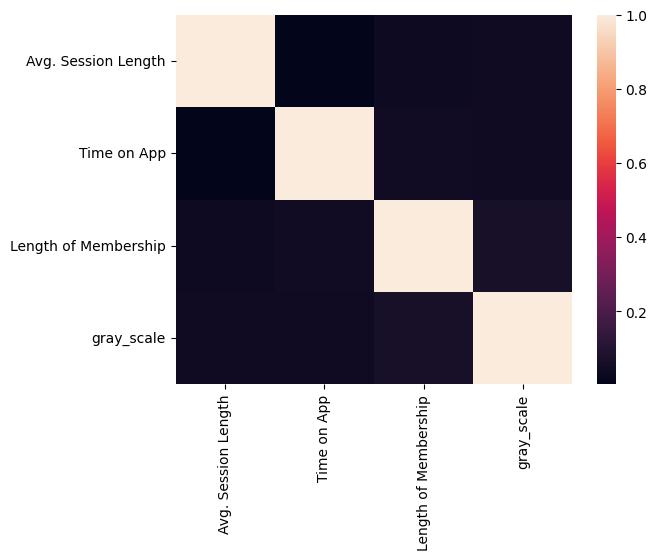

In [181]:
sns.heatmap(X_train.corr())

## Outlier Removing

In [182]:
from outlier_removing import ZscoreMethod

In [183]:
X_train.skew()

Avg. Session Length    -0.071375
Time on App            -0.183264
Length of Membership   -0.129837
gray_scale             -0.154233
dtype: float64

#### it's seen that none of columns is normally distributed

In [184]:
obj1 = ZscoreMethod(X_train, y_train)

In [185]:
X_train, y_train = obj1.remove_outliers()

Data shape before: (350, 4)
Target shape before: (350,)
Col name : Avg. Session Length
Mean : 33.06
Std : 0.991
Bounds : 30.086 and 36.035
Outliers removed : 1
Col name : Time on App
Mean : 12.052
Std : 1.005
Bounds : 9.037 and 15.067
Outliers removed : 3
Col name : Length of Membership
Mean : 3.578
Std : 1.023
Bounds : 0.509 and 6.647
Outliers removed : 2
Col name : gray_scale
Mean : 149.519
Std : 66.209
Bounds : -49.108 and 348.145
Outliers removed : 0
Data shape after: (344, 4)
Target shape after: (344,)


In [186]:
X_train.shape, y_train.shape

((344, 4), (344,))

## ====================================================================

In [187]:
X_test.skew()

Avg. Session Length     0.058623
Time on App             0.158400
Length of Membership   -0.112607
gray_scale             -0.464656
dtype: float64

In [188]:
obj2 = ZscoreMethod(X_test, y_test)

In [189]:
X_test, y_test = obj2.remove_outliers()

Data shape before: (150, 4)
Target shape before: (150,)
Col name : Avg. Session Length
Mean : 33.037
Std : 0.998
Bounds : 30.042 and 36.032
Outliers removed : 1
Col name : Time on App
Mean : 12.061
Std : 0.975
Bounds : 9.137 and 14.985
Outliers removed : 0
Col name : Length of Membership
Mean : 3.432
Std : 0.925
Bounds : 0.656 and 6.207
Outliers removed : 0
Col name : gray_scale
Mean : 168.498
Std : 60.748
Bounds : -13.745 and 350.742
Outliers removed : 0
Data shape after: (149, 4)
Target shape after: (149,)


## Scaling

### Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values

In [190]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [191]:
sts = StandardScaler()
mm = MinMaxScaler()

X_train_sts = sts.fit_transform(X_train)
X_test_sts = sts.transform(X_test)

X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

# =============================================================

# Modeling

# =============================================================

# Linear Regression

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [216]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [217]:
y_pred_tr = lin_reg.predict(X_train)
y_pred = lin_reg.predict(X_test)

### R2

In [218]:
print(r2_score(y_train, y_pred_tr))
print(r2_score(y_test, y_pred))

0.983901507194181
0.9806438969499274


### MAE

In [220]:
print(mean_absolute_error(y_train, y_pred_tr))
print(mean_absolute_error(y_test, y_pred))

7.666204769143923
8.463417030070394


# =============================================================

# Decision Tree

In [223]:
from sklearn.tree import DecisionTreeRegressor

### 6 max depth

In [224]:
dec_tree = DecisionTreeRegressor(max_depth=6)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [225]:
y_pred_tr = dec_tree.predict(X_train)
y_pred = dec_tree.predict(X_test)

### R2

In [226]:
print(r2_score(y_train, y_pred_tr))
print(r2_score(y_test, y_pred))

0.9573134133142673
0.8593964816990438


### MAE

In [234]:
print(mean_absolute_error(y_train, y_pred_tr))
print(mean_absolute_error(y_test, y_pred))

32.20167367021347
46.03518367087394


# =============================================================

# KNN Regression

In [235]:
from sklearn.neighbors import KNeighborsRegressor

### 3 neighbors

In [236]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [237]:
y_pred_tr = knn_reg.predict(X_train)
y_pred = knn_reg.predict(X_test)

### R2

In [238]:
print(r2_score(y_train, y_pred_tr))
print(r2_score(y_test, y_pred))

0.7120920843371216
0.3671143724526522


### MAE

In [239]:
print(mean_absolute_error(y_train, y_pred_tr))
print(mean_absolute_error(y_test, y_pred))

32.20167367021347
46.03518367087394


# =============================================================

# SVM

In [240]:
from sklearn.svm import SVR

## C = 1       epsilon = 1

In [241]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1, epsilon=1)

In [242]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=1, kernel='linear')

In [243]:
y_pred_tr = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [244]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9828764261223764
R2 for test set :  0.9798566996354444


In [245]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  7.957997147122128
MSE tr :  102.72322572927662
MAE test :  8.541064214404376
MSE test :  108.72642363707331


## C = 1       epsilon = 10

In [246]:
svr = SVR(kernel='linear', C=1, epsilon=10)

In [247]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=10, kernel='linear')

In [248]:
y_pred_tr = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [249]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9802867792866646
R2 for test set :  0.9770641560260374


In [250]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  8.61072930675464
MSE tr :  118.25835165363402
MAE test :  9.15755319172475
MSE test :  123.79958811391649


## C = 10       epsilon = 1

In [251]:
svr = SVR(kernel='linear', C=10, epsilon=1)

In [252]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=1, kernel='linear')

In [253]:
y_pred_tr = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [254]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9838586919153721
R2 for test set :  0.9805560286869235


In [255]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  7.647612669106585
MSE tr :  96.8306759904684
MAE test :  8.508734894913665
MSE test :  104.95169232012336


## C = 10       epsilon = 10

In [256]:
svr = SVR(kernel='linear', C=10, epsilon=10)

In [257]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=10, kernel='linear')

In [258]:
y_pred_tr = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [259]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9838033879846039
R2 for test set :  0.9803003212106666


In [260]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  7.6978498156971025
MSE tr :  97.162440737981
MAE test :  8.53054383204461
MSE test :  106.3319109976739


# =============================================================

# Random Forest

In [261]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=20, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [262]:
y_pred_tr = rf_reg.predict(X_train)
y_pred = rf_reg.predict(X_test)

In [263]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9883128116005403
R2 for test set :  0.9400791210033101


In [264]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  6.345488174434668
MSE tr :  70.11069655658166
MAE test :  14.245986106623873
MSE test :  323.43174934549296


# =============================================================

# CV

In [265]:
from sklearn.model_selection import cross_val_score

In [266]:
models = [lin_reg, dec_tree, knn_reg, svr, rf_reg]

In [268]:
for model in models:
    print("Model:",model)
    print('\n')
    print(cross_val_score(model, X, y, cv=5), '-----Mean------ >', np.mean(cross_val_score(model, X, y, cv=5)))
    print('='*100)
    print('\n')

Model: LinearRegression()


[0.98283898 0.98201898 0.98717014 0.98420209 0.98229952] -----Mean------ > 0.9837059401020515


Model: DecisionTreeRegressor(max_depth=6)


[0.7859442  0.74877733 0.85368985 0.85918215 0.8161898 ] -----Mean------ > 0.8115571555050266


Model: KNeighborsRegressor(n_neighbors=3)


[0.3185826  0.42679348 0.56853881 0.31714969 0.44297055] -----Mean------ > 0.41480702674557507


Model: SVR(C=10, epsilon=10, kernel='linear')


[0.9831111  0.98203737 0.98729264 0.98355107 0.98196992] -----Mean------ > 0.9835924177451361


Model: RandomForestRegressor(n_estimators=20, random_state=0)


[0.92477239 0.93681019 0.93096955 0.91989093 0.92997845] -----Mean------ > 0.9284843034950176




# =============================================================

# Lazy Predict Regressor

In [269]:
from lazypredict.Supervised import LazyRegressor

In [270]:
reg = LazyRegressor(ignore_warnings=True, verbose=False)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:18<00:00,  2.30it/s]


In [271]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Ridge,0.98,0.98,10.22,0.02
RidgeCV,0.98,0.98,10.22,0.01
BayesianRidge,0.98,0.98,10.22,0.02
LinearRegression,0.98,0.98,10.22,0.02
TransformedTargetRegressor,0.98,0.98,10.22,0.01
Lars,0.98,0.98,10.22,0.02
RANSACRegressor,0.98,0.98,10.22,0.01
SGDRegressor,0.98,0.98,10.22,0.02
OrthogonalMatchingPursuitCV,0.98,0.98,10.22,0.02


# =============================================================

# Ensemble Learning Methods

# =============================================================

# Bagging Regressor

In [272]:
from sklearn.ensemble import BaggingRegressor

In [273]:
bag_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                             n_estimators=100,
                             max_samples=0.8,
                             oob_score=True,
                             random_state=0)

bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=100, oob_score=True, random_state=0)

In [274]:
bag_model.oob_score_

0.9363204965023977

In [275]:
y_pred_tr = bag_model.predict(X_train)
y_pred = bag_model.predict(X_test)

In [276]:
print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

R2 for train set :  0.9874412460589956
R2 for test set :  0.9457887338785614


In [277]:
print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

MAE tr :  6.40848276435741
MSE tr :  75.33916255916944
MAE test :  13.233579292097195
MSE test :  292.61327486299973


# Combination

In [278]:
print("Model: Decision Tree Regressor")
print('\n')
print(cross_val_score(bag_model, X, y, cv=5), '-----Mean------ >', np.mean(cross_val_score(bag_model, X, y, cv=5)))
print('='*100)
print('\n')

Model: Decision Tree Regressor


[0.93503246 0.94084746 0.93871126 0.93204788 0.93642656] -----Mean------ > 0.9366131258831834




## Ada Boost Regressor

### Ada Boost

In [279]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [280]:
adaboost = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.2).fit(X_train, y_train)
score = adaboost.score(X_test, y_test)

score

0.8779799966682671

In [281]:
y_pred_tr = adaboost.predict(X_train)
y_pred = adaboost.predict(X_test)

print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

R2 for train set :  0.9180862986419279
R2 for test set :  0.8779799966682671
MAE tr :  17.520249078668407
MSE tr :  491.3950612799
MAE test :  20.007322445207244
MSE test :  658.6208979829122


### XG Boost

In [283]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [284]:
score = xgb.score(X_test, y_test)
score

0.9487461377254878

In [285]:
y_pred_tr = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

R2 for train set :  0.9999893396858698
R2 for test set :  0.9487461377254878
MAE tr :  0.1770321240253384
MSE tr :  0.06395054341831315
MAE test :  13.08979522360489
MSE test :  276.6502530290688


# LightGBM Regressor

In [286]:
import lightgbm

In [287]:
light = lightgbm.LGBMRegressor()

light.fit(X_train, y_train)

LGBMRegressor()

In [290]:
light.score(X_test, y_test)

0.9503100027759486

In [291]:
y_pred_tr = light.predict(X_train)
y_pred = light.predict(X_test)

print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

R2 for train set :  0.9848737924528849
R2 for test set :  0.9503100027759486
MAE tr :  6.43190152910654
MSE tr :  90.74115271699468
MAE test :  12.535536482532002
MSE test :  268.20906161999864


# Stacking

In [292]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='linear')

In [293]:
stack = StackingCVRegressor(regressors=(ridge, lasso, svr, rf, lgbm, xgb),
                            meta_regressor=LinearRegression(), cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

pred = stack.predict(X_test)
score = r2_score(y_test, pred)

score

0.9806499931189178

In [294]:
y_pred_tr = stack.predict(X_train)
y_pred = stack.predict(X_test)

print('R2 for train set : ', r2_score(y_train, y_pred_tr))
print('R2 for test set : ', r2_score(y_test, y_pred))

print('MAE tr : ', mean_absolute_error(y_train, y_pred_tr))
print('MSE tr : ', mean_squared_error(y_train, y_pred_tr))
print('MAE test : ', mean_absolute_error(y_test, y_pred))
print('MSE test : ', mean_squared_error(y_test, y_pred))

R2 for train set :  0.985110486961307
R2 for test set :  0.9806499931189178
MAE tr :  7.39135397209078
MSE tr :  89.3212374825183
MAE test :  8.431285388476894
MSE test :  104.4445054910074
